In [1]:
!pip install mat73
import mat73

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive

# Monta il Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define a class to perform statistical analysis and visualization on labeled image data in a DataFrame.
class Statistic_of_Dataframe:

    # Define the constructor method for the class.
    def __init__(self):
        # Initialize an empty dictionary to store counts of image shapes.
        self.count = {}

    # Define a method to count image shapes for each class in the DataFrame and store the counts in the dictionary self.count.
    def count_types_image_for_every_class(self, df):
        """
        Counts image shapes for each class in DataFrame df and stores counts in self.count.

        Args:
        - df: DataFrame containing labeled observations and images.
        """
        # Loop through unique labels in the DataFrame.
        for label in df["Label"].unique():
            # Select the rows corresponding to the current label.
            x = df.loc[df['Label'] == label].reset_index(drop=True)
            # Initialize an empty dictionary to store counts for the current label.
            self.count[label] = {}
            # Create an alias for the current count dictionary.
            y = self.count[label]
            # Loop through the selected rows for the current label.
            for i in range(len(x)):
                # Get the image from the current row.
                image = x.at[i, "Image"]
                # Get the shape of the image.
                shape = image.shape
                # If the shape is already in the count dictionary, increment the count for that shape by 1. Otherwise, initialize the count for that shape to 1.
                if shape in y:
                    y[shape] += 1
                else:
                    y[shape] = 1

    # Define a method to create bar plots showing the distribution of image shapes for each class in the dictionary self.count.
    def create_graphics(self, num_item_to_show=10):
        """
        Creates bar plots showing the distribution of image shapes for each class in self.count.

        Args:
        - num_item_to_show: Number of top items to show in each bar plot (default: 10).
        """
        # Check if self.count is empty. If it is empty, print a message.
        if self.count =={}:
            print("Count is empty. Please implement the count_types_image_for_every_class method ")
        # Iterate through each class (label) in self.count.
        for label in self.count.keys():
            # Get the dictionary of shape counts for the current class.
            y = self.count[label]
            x_axis = []
            y_axis = []
            # Sort the shape counts in descending order.
            sorted_tuple_list = sorted(y.items(), key=lambda x: x[1], reverse=True)
            self.count[label] = dict(sorted_tuple_list)
            # Prepare data for plotting.
            for item in sorted_tuple_list:
                x_axis.append(str(item[0]))
                y_axis.append(item[1])
            # Limit the number of items shown in the bar plot to num_item_to_show.
            if len(x_axis) > num_item_to_show:
                x_axis = x_axis[:num_item_to_show]
                y_axis = y_axis[:num_item_to_show]
            # Create and display the bar plot.
            plt.figure(figsize=(10, 6))
            plt.bar(x_axis, y_axis)
            plt.xlabel('Dimension')
            plt.ylabel('Occurrences')
            plt.title(f'Barplot of {label} images')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

## evaluate the range of image

the first dataset has a precision to 14 bit and not the canonical 8 bit

In [5]:
def normalize_to_8bit(image):
    """
    Normalize an image  to an 8-bit image.

    Args:
    - image: 2D numpy array with 12-bit or 14-bit pixel values.

    Returns:
    - norm_image: 2D numpy array with 8-bit pixel values (0-255).
    """
    # Convert to float for precision during normalization
    image = image.astype(np.float32)

    # Normalize to range 0-1
    image = image -  image.min()
    image = image / image.max()

    # Scale to range 0-255
    image = image * 255

    # Convert back to uint8
    norm_image = image.astype(np.uint8)

    return norm_image

In [6]:

def transform_grayscale(image):

  if len(image.shape) > 2:

      # red_band
      red = image[:,:,0]
      # green banc
      green = image[:,:,1]
      # bòue bands
      blue = image[:,:,2]
      gray = 0.2989 * red + 0.5870 * green + 0.1140 * blue

      print("The shape was", image.shape, "and now is", gray.shape)
      print(" The range of values is ",np.min(image),np.max(image))
      return gray

  print("The shape is", image.shape)
  print(" The range of values is ",np.min(image),np.max(image))
  return image

In [7]:
path1 = "/content/drive/MyDrive/New Progetto Data mining/Immagini/documento_immaigni_new"
path2 = "/content/drive/MyDrive/New Progetto Data mining/Immagini/no"


##mapping
## 1 for meningioma, 2 for glioma, 3 for pituitary tumor

In [8]:
os.listdir(path2)

['no1405.jpg',
 'no1444.jpg',
 'no1394.jpg',
 'no143.jpg',
 'no1393.jpg',
 'no1386.jpg',
 'no1387.jpg',
 'no1435.jpg',
 'no1382.jpg',
 'no1447.jpg',
 'no1436.jpg',
 'no1470.jpg',
 'no1498.jpg',
 'no1460.jpg',
 'no169.jpg',
 'no1456.jpg',
 'no1473.jpg',
 'no181.jpg',
 'no1499.jpg',
 'no1458.jpg',
 'no180.jpg',
 'no1492.jpg',
 'no1485.jpg',
 'no1472.jpg',
 'no1459.jpg',
 'no176.jpg',
 'no182.jpg',
 'no1455.jpg',
 'no163.jpg',
 'no1478.jpg',
 'no161.jpg',
 'no184.jpg',
 'no1474.jpg',
 'no167.jpg',
 'no166.jpg',
 'no1454.jpg',
 'no1476.jpg',
 'no168.jpg',
 'no172.jpg',
 'no178.jpg',
 'no155.jpg',
 'no16.jpg',
 'no1477.jpg',
 'no1482.jpg',
 'no162.jpg',
 'no158.jpg',
 'no152.jpg',
 'no150.jpg',
 'no1466.jpg',
 'no1486.jpg',
 'no157.jpg',
 'no1484.jpg',
 'no171.jpg',
 'no1468.jpg',
 'no147.jpg',
 'no173.jpg',
 'no149.jpg',
 'no1464.jpg',
 'no1497.jpg',
 'no186.jpg',
 'no153.jpg',
 'no1488.jpg',
 'no170.jpg',
 'no148.jpg',
 'no1475.jpg',
 'no1461.jpg',
 'no1467.jpg',
 'no1491.jpg',
 'no1489.j

In [9]:
df_first = pd.DataFrame()

c = 0


for p in os.listdir(path1):
    new_path = os.path.join(path1, p)
    for file_name in os.listdir(new_path):


        dict_image = mat73.loadmat(os.path.join(new_path, file_name))


        x = dict_image['cjdata']['image']
        x = transform_grayscale(x)
        x =  normalize_to_8bit(x)
        print("The range value now is", np.min(x), np.max(x) )
        y = dict_image['cjdata']['label']




        if y == 1:
            y = "meningioma"
        elif y == 2:
            y = "glioma"
        elif y == 3:
            y = "pituitary tumor"


        df = pd.DataFrame({'Image': [x], 'Label': y})


        df_first = pd.concat([df_first, df], ignore_index=True)

        print(c)
        c += 1



Output streaming troncato alle ultime 5000 righe.
The shape is (512, 512)
 The range of values is  0 3475
The range value now is 0 255
1814
The shape is (512, 512)
 The range of values is  0 1033
The range value now is 0 255
1815
The shape is (512, 512)
 The range of values is  0 4509
The range value now is 0 255
1816
The shape is (512, 512)
 The range of values is  0 939
The range value now is 0 255
1817
The shape is (512, 512)
 The range of values is  0 3176
The range value now is 0 255
1818
The shape is (512, 512)
 The range of values is  0 4426
The range value now is 0 255
1819
The shape is (512, 512)
 The range of values is  0 897
The range value now is 0 255
1820
The shape is (512, 512)
 The range of values is  0 3082
The range value now is 0 255
1821
The shape is (512, 512)
 The range of values is  0 1662
The range value now is 0 255
1822
The shape is (512, 512)
 The range of values is  0 5740
The range value now is 0 255
1823
The shape is (512, 512)
 The range of values is  0 3

##show the resuts

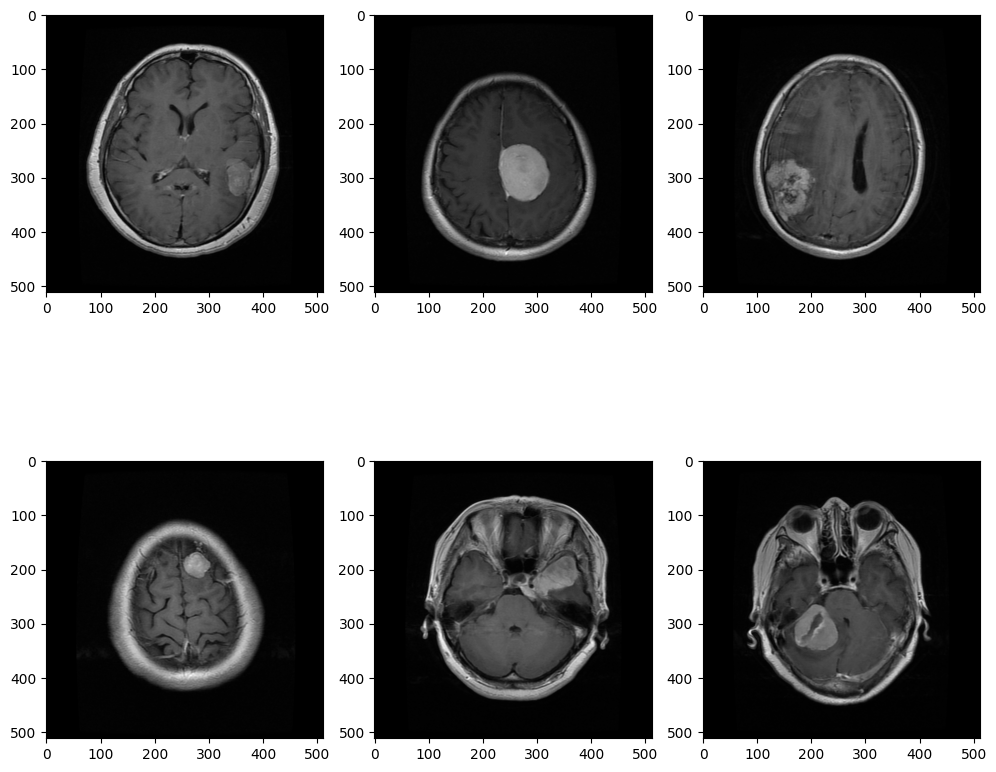

In [10]:
num_example = 6
num_col = 3
num_row =  num_example// num_col


plt.figure(figsize=(10, 10))

for i in range(num_example):

  image = df_first.at[i, "Image"]
  plt.subplot(num_row, num_col, i + 1)
  plt.imshow(image, cmap = "gray")

plt.tight_layout()  # Adds automatically space
plt.show()



In [11]:
df_second = pd.DataFrame()


c = 0

for file_name in os.listdir(path2):


  new_path = os.path.join(path2,file_name )
  x = plt.imread(new_path)
  x = transform_grayscale(x)
  y = "notumor"


  df = pd.DataFrame({'Image': [x], 'Label': y})


  df_second = pd.concat([df_second, df], ignore_index=True)

  print(c)
  c += 1









The shape was (225, 225, 3) and now is (225, 225)
 The range of values is  0 255
0
The shape was (197, 177, 3) and now is (197, 177)
 The range of values is  0 255
1
The shape was (201, 173, 3) and now is (201, 173)
 The range of values is  0 255
2
The shape was (225, 225, 3) and now is (225, 225)
 The range of values is  0 255
3
The shape was (251, 201, 3) and now is (251, 201)
 The range of values is  0 255
4
The shape is (630, 630)
 The range of values is  0 255
5
The shape was (225, 225, 3) and now is (225, 225)
 The range of values is  0 255
6
The shape was (257, 196, 3) and now is (257, 196)
 The range of values is  0 255
7
The shape was (225, 225, 3) and now is (225, 225)
 The range of values is  0 255
8
The shape was (259, 194, 3) and now is (259, 194)
 The range of values is  0 255
9
The shape was (225, 225, 3) and now is (225, 225)
 The range of values is  0 255
10
The shape was (192, 192, 3) and now is (192, 192)
 The range of values is  0 255
11
The shape was (222, 227, 3) 

In [13]:
complete_df = pd.concat([df_first, df_second])

In [ ]:
complete_df = complete_df.sample(frac=1).reset_index(drop=True)

# **VISUALIZATION OF THE DATAFRAME**

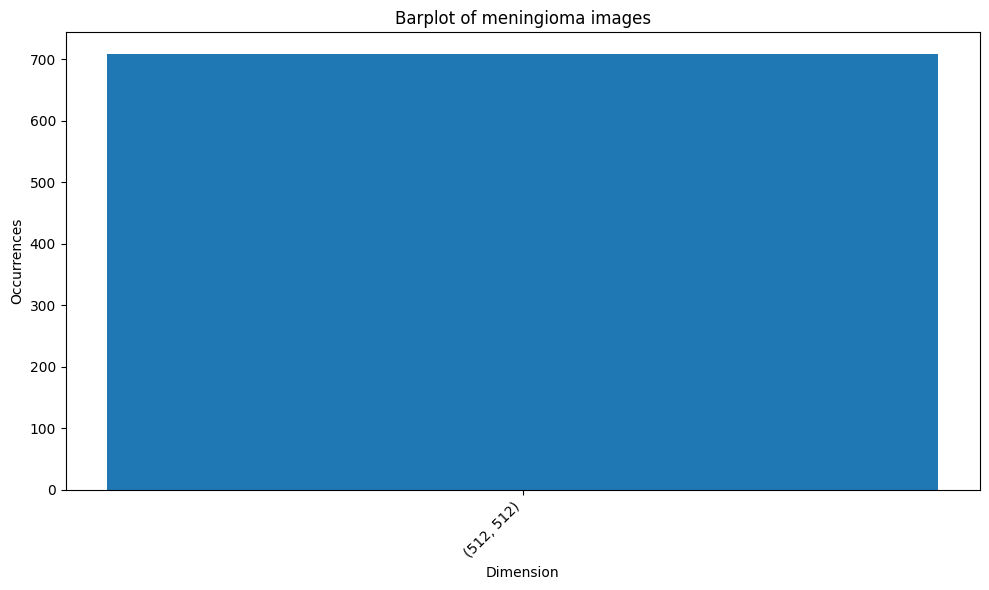

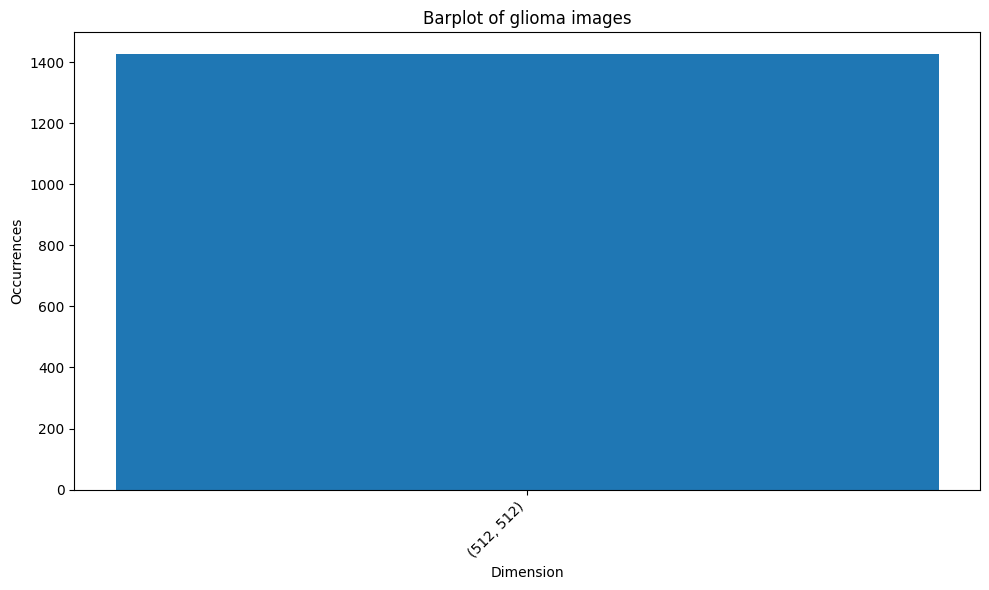

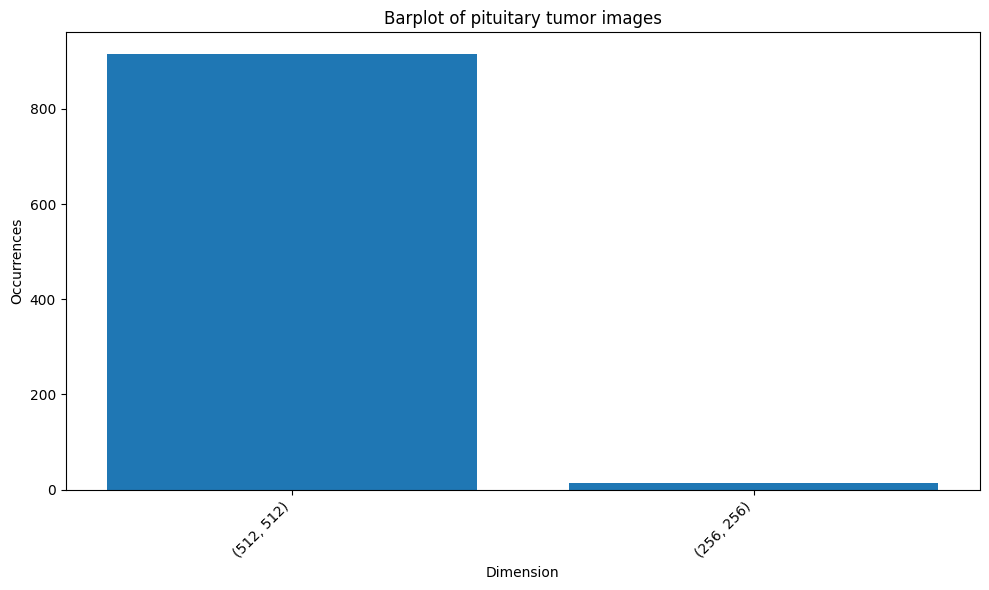

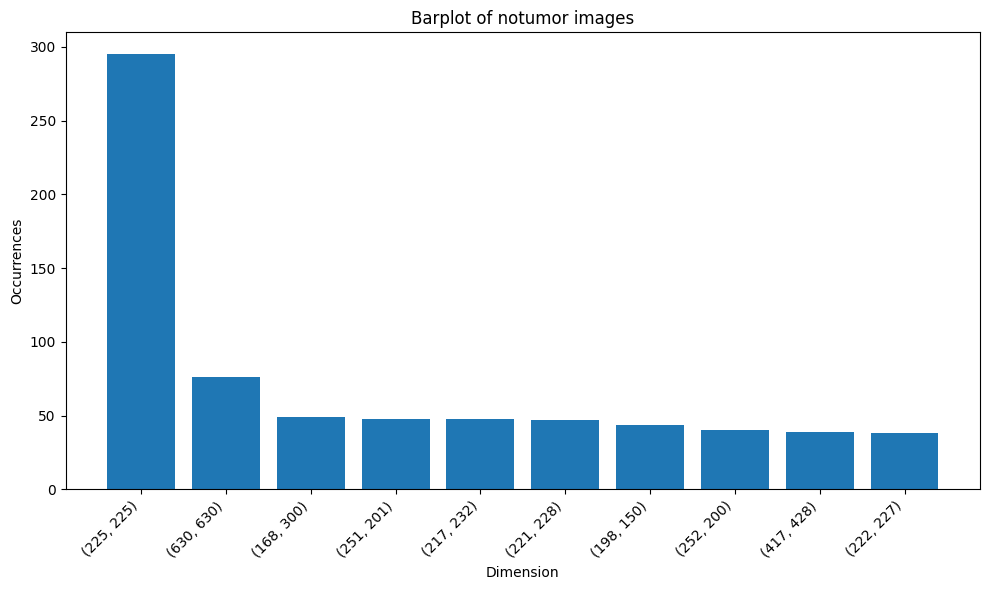

In [14]:
# Create an instance of the 'Statistic_of_Dataframe' class and assign it to the 'u' variable.
u = Statistic_of_Dataframe()
# Call the 'count_types_image_for_every_class' method on the 'u' object passing the DataFrame as argument.
u.count_types_image_for_every_class(complete_df)
# Call the 'create_graphics' method on the 'u' object.
u.create_graphics()

In [ ]:
complete_df

,Image,Label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",glioma
1,"[[10.998899999999999, 10.998899999999999, 10.9...",notumor
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",glioma
3,"[[254.7465, 2.0707, 37.0672, 39.06699999999999...",notumor
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",notumor
...,...,...
4559,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",glioma
4560,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",meningioma
4561,"[[85.9914, 24.997500000000002, 25.9974, 25.997...",notumor
4562,"[[3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1,...",notumor


In [ ]:
complete_df.to_pickle("/content/drive/MyDrive/ProgettoDataMining/complete_df.pkl")

In [ ]:
""" df = pd.read_pickle("/content/drive/MyDrive/ProgettoDataMining/complete_df.pkl")
for i in  range(len(df)):
  image = df.at[i,"Image"]
  print(image.shape) """